In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE

In [5]:
df_red = pd.read_csv('winequality-red.csv',sep=";")
df_white = pd.read_csv('winequality-white.csv',sep=";")

In [6]:
print(df_red.shape,df_white.shape)

(1599, 12) (4898, 12)


In [7]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
#df _red

In [10]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df_red['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [12]:
df_white['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [13]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


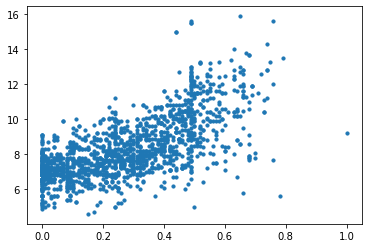

In [14]:
plt.scatter(df_red['citric acid'],df_red['fixed acidity'],s=10)

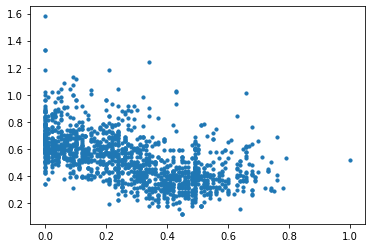

In [15]:
plt.scatter(df_red['citric acid'],df_red['volatile acidity'],s=10)

In [16]:
df_red['quality'].nunique()

6

In [17]:
df_white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [18]:
df_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


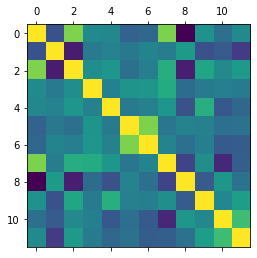

In [19]:
plt.matshow(df_red.corr())

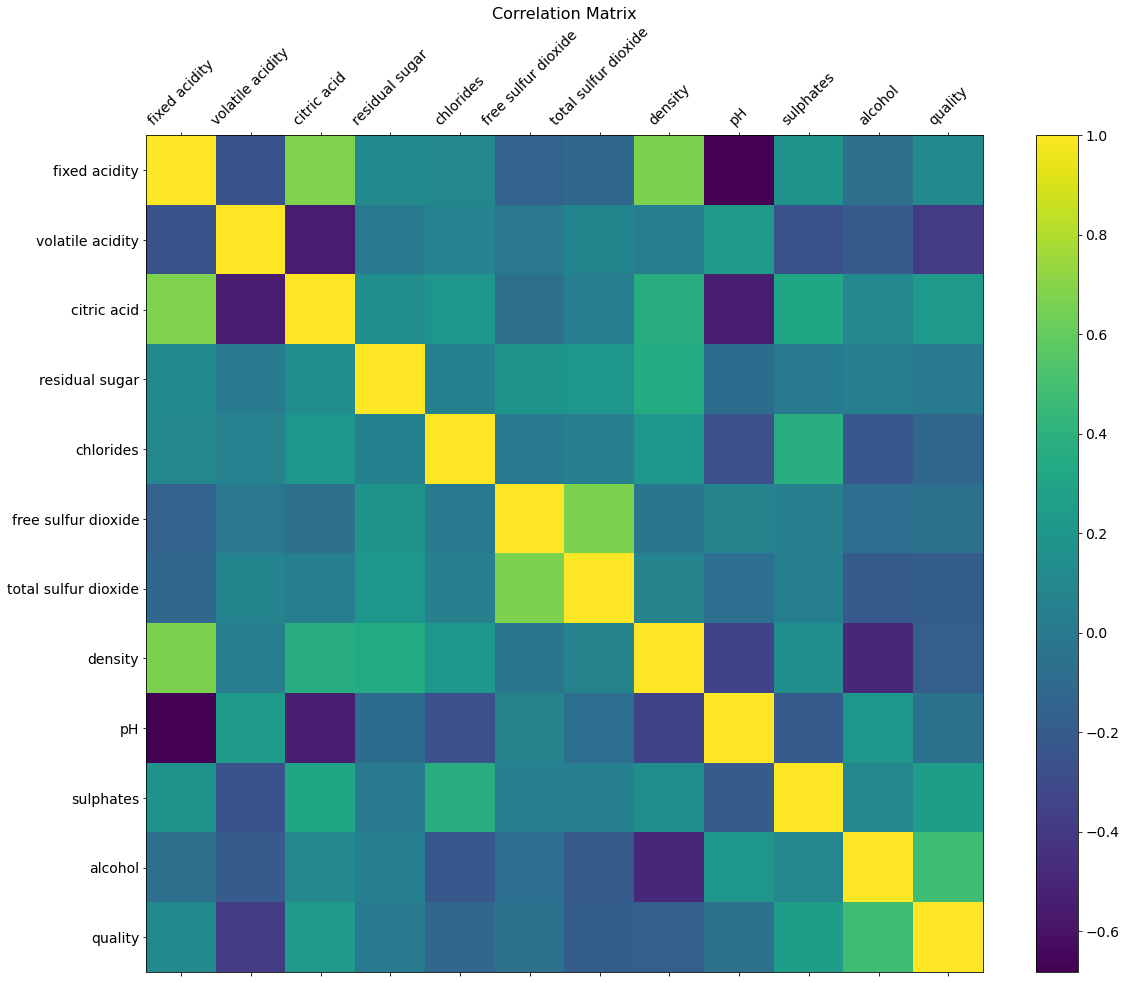

In [20]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_red.corr(), fignum=f.number)
plt.xticks(range(df_red.shape[1]), df_red.columns, fontsize=14, rotation=45)
plt.yticks(range(df_red.shape[1]), df_red.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

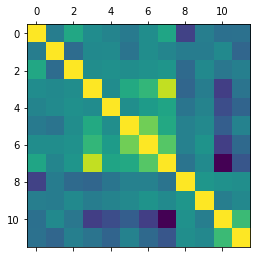

In [21]:
plt.matshow(df_white.corr())

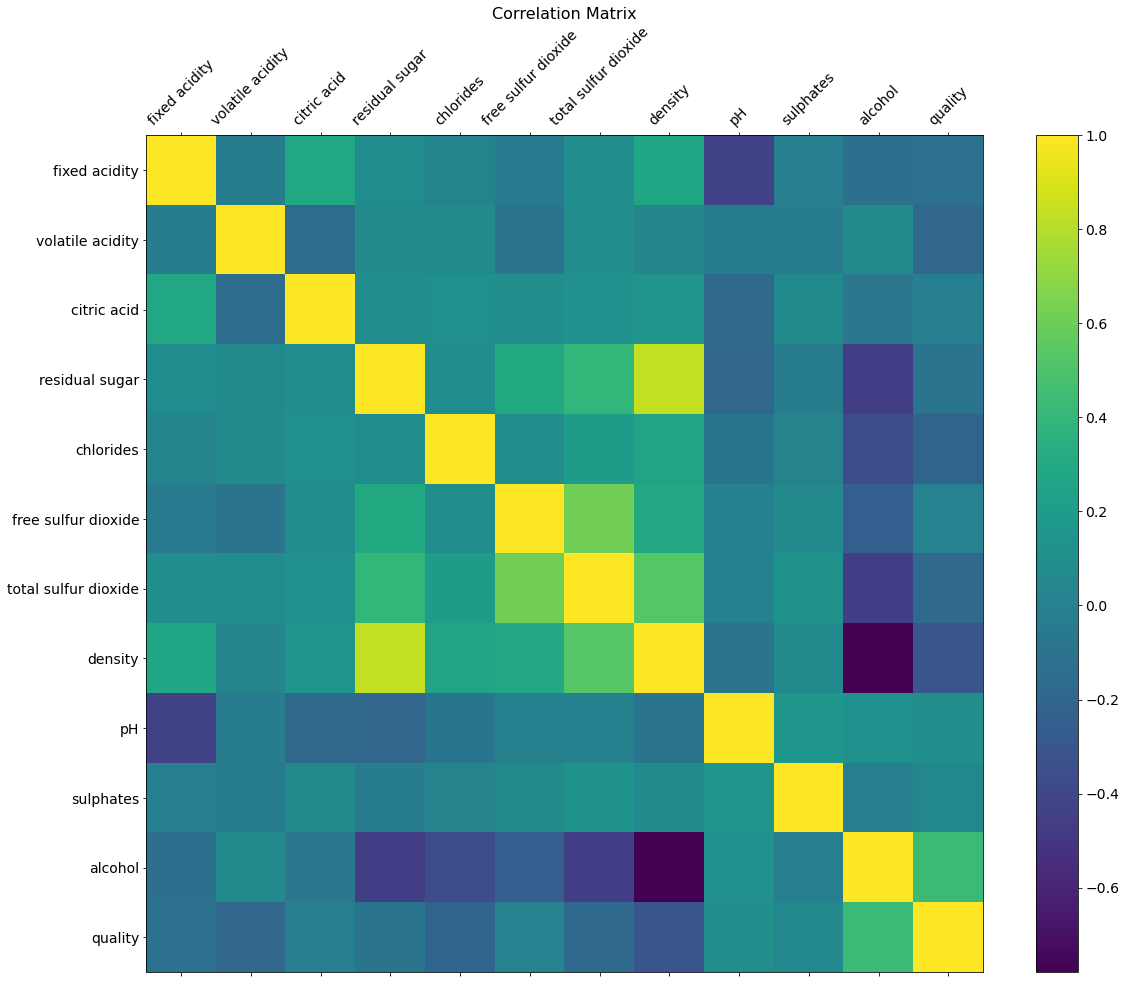

In [22]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_white.corr(), fignum=f.number)
plt.xticks(range(df_white.shape[1]), df_white.columns, fontsize=14, rotation=45)
plt.yticks(range(df_white.shape[1]), df_white.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [23]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

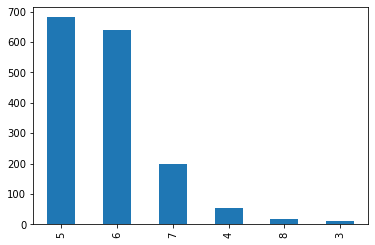

In [24]:
df_red['quality'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

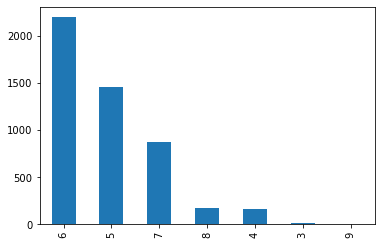

In [25]:
df_white['quality'].value_counts().plot(kind = 'bar')

In [26]:
#combining both red and white wines

In [27]:
df_white = pd.concat([df_white,df_red])
df_white.shape

(6497, 12)

In [28]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
#White wine

In [30]:
df_white = pd.concat([df_red,df_white])

In [31]:
df_white.shape

(8096, 12)

<AxesSubplot:>

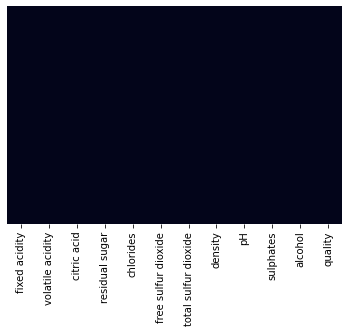

In [32]:
sns.heatmap(df_white.isna(),cbar=False,yticklabels=False)

In [33]:
df_white['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 8096, dtype: int64

In [34]:
#splitting train and valid data

In [35]:
y = df_white['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 8096, dtype: int64

In [36]:
y.nunique()

7

<AxesSubplot:>

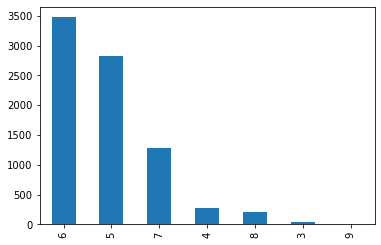

In [37]:
y.value_counts().plot(kind='bar')

In [38]:
df_white.drop(['quality'],axis=1,inplace = True)

In [39]:
X = df_white.copy()
#X = X.to_numpy()
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [40]:
#Fixing class imbalance at the fundamental level

In [41]:
oversampler = SMOTE(k_neighbors=4)

In [42]:
X, y = oversampler.fit_resample(X,y)

<AxesSubplot:>

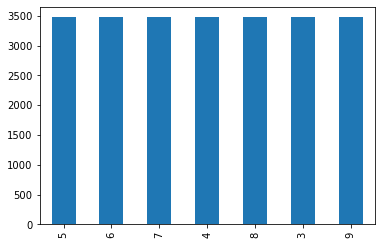

In [43]:
y.value_counts().plot(kind = 'bar')

In [41]:
for i in range(len(y)):
    if(y[i]>5):
        y[i] = 1
    else:
        y[i] = 0
y

0        0
1        0
2        0
3        1
4        0
        ..
24313    1
24314    1
24315    1
24316    1
24317    1
Name: quality, Length: 24318, dtype: int64

<AxesSubplot:>

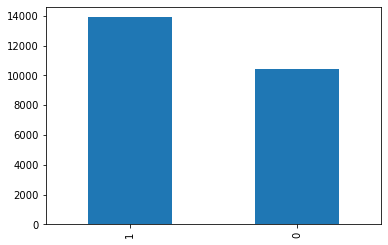

In [42]:
y.value_counts().plot(kind = 'bar')

In [43]:
#Feature Importance

In [44]:
t = X.columns
t

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [45]:
rmod = RandomForestRegressor()
rmod.fit(X,y)

RandomForestRegressor()

In [46]:
importances = rmod.feature_importances_
importances

array([0.03360936, 0.16048818, 0.03789177, 0.03967401, 0.0402278 ,
       0.0972911 , 0.06303967, 0.03869999, 0.03977718, 0.08543633,
       0.3638646 ])

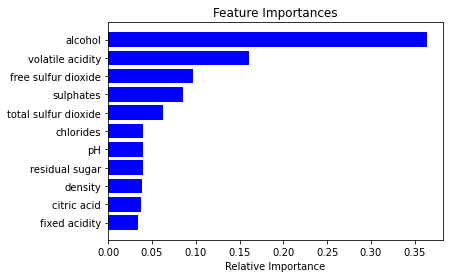

In [47]:
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
fl = []

In [49]:
#picking top 8 features

In [50]:
for i in range(8):
    fl.append(t[i])
fl
    

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density']

In [51]:
#X = X[fl]
#X.shape

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8)

In [53]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19454, 11) (4864, 11) (19454,) (4864,)


In [54]:
#scaling the data

In [55]:
scalemod = StandardScaler()
X_train = scalemod.fit_transform(X_train)
X_test = scalemod.fit_transform(X_test)

In [56]:
#Using SVM

In [57]:
smod = SVC()

In [58]:
smod.fit(X_train,y_train)

SVC()

In [59]:
spred = smod.predict(X_test)
spred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [60]:
params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}

In [61]:
grid_search = GridSearchCV(estimator=smod, 
                           param_grid=params,
                           cv=10,
                           verbose=3, scoring = "accuracy")

In [62]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=   7.5s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   7.5s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.930 total time=   7.6s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   7.5s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=   7.5s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.916 total time=   7.4s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   7.5s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   7.5s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.911 total time=   7.6s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   7.5s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   5.3s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [63]:
print(grid_search.best_estimator_)

SVC(C=100, gamma=1)


In [64]:
print(grid_search.best_score_)

0.9520917470944287


In [65]:
print(classification_report(spred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2200
           1       0.89      0.93      0.91      2664

    accuracy                           0.90      4864
   macro avg       0.90      0.90      0.90      4864
weighted avg       0.90      0.90      0.90      4864



In [66]:
#using xgboost

In [67]:
xmod = XGBClassifier()
xmod.fit(X_train,y_train)

[12:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
print(classification_report(xmod.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2203
           1       0.92      0.96      0.94      2661

    accuracy                           0.93      4864
   macro avg       0.94      0.93      0.93      4864
weighted avg       0.93      0.93      0.93      4864



In [69]:
#Using decision trees

In [70]:
dmod = DecisionTreeClassifier()
dmod.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
print(classification_report(dmod.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2102
           1       0.93      0.93      0.93      2762

    accuracy                           0.92      4864
   macro avg       0.92      0.92      0.92      4864
weighted avg       0.92      0.92      0.92      4864



In [72]:
#Hyperparameter tuning

In [73]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [74]:
grid_search = GridSearchCV(estimator=dmod, 
                           param_grid=params,
                           cv = 10,
                           verbose=2, scoring = "accuracy")

In [75]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_s

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=2)

In [76]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)


In [77]:
print(grid_search.best_score_)

0.9173942197692453
